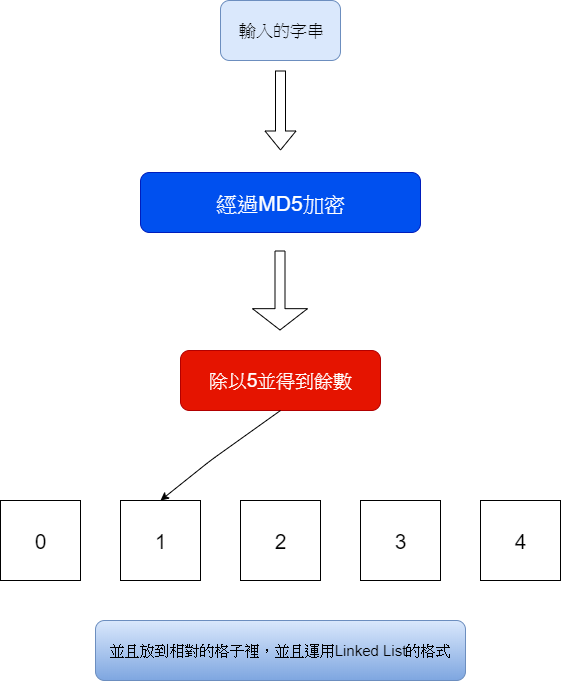

In [1]:
from IPython.display import Image
Image(filename="D:/Downloads/Untitled Diagram (3).png")

學習歷程:
一開始其實我不太理解 Hash Table的意思，只是覺得雜湊表這個名子感覺很酷
後來是在pair programming要跟同伴解開LeetCode的Design LinkedList的時候才比較理解

因為這次的作業有要求要把輸入的數用MD5加密後，再儲存進去，所以我寫了一個會轉變成MD5的function，等等的程式碼都會呼叫到他

In [ ]:
def code(self,key): #轉換成MD5
    h = MD5.new()
    key = str(key)
    h.update(key.encode("utf-8")) 
    key = int(h.hexdigest(),16)
    return(key)

接下來是增加的部分，一開始先把要增加的數轉變成MD5
然後再除以5看要放進哪一個格子裡面 [0,1,2,3,4]
假如所屬的格子沒有東西，就直接建立一個linked list
如果已經有東西了，就找這個linked list的最後面並且接上去

In [ ]:
def add(self, key): #增加
        code = MyHashSet().code(key) # 將輸入的轉成MD5
        bucketcode = code % self.capacity #看要放進哪一個格子
        cur = self.data[bucketcode] 
        if cur is None: #如果這個格子沒有這個東西，就直接建立一個ListNode
            self.data[bucketcode] = ListNode(code)
            return
        while cur: #只要有cur
            if cur.next is None: #如果下一個沒有東西，就建立下一個
                cur.next = ListNode(code) 
                return
            else:
                cur = cur.next #繼續往下一個找

移除的部分，一開始也是先將要刪掉的質轉變成MD5
並且透過餘數去尋找放在哪個格子
因為老師設定的是要把所有的數都刪掉
所以我一開始先設置了一個條件如果Linked List裡面沒有這個質就回傳
接下來
如果一開始就是要刪的數，就將第二個設定為頭，並且繼續刪除
如果不是頭，就繼續往下面找，

In [ ]:
def remove(self, key): #移除
    code = MyHashSet().code(key) #將輸入的轉成MD5
    bucketcode = code % self.capacity
    cur = self.data[bucketcode]
    while self.contains(key) is False: #如果沒有了輸入的數字直接回傳
        return
    if cur.val == code: #如果第一個就是要刪除的數
        self.data[bucketcode] = cur.next #將下一個指認為頭
        self.remove(key) #繼續尋找有沒有別的
        return 
    while cur.next: #如果有下一個
        if cur.next.val == code: #如果下一個是要刪除的數
            cur.next = cur.next.next #刪除中間的
            self.remove(key) #繼續尋找
            return

尋找的部分
一開始也是先轉成MD5
並且去餘數所對應的格子裡尋找
如果找到就回傳True
沒找到就回傳False

In [ ]:
def contains(self, key):
    code =  MyHashSet().code(key)
    bucketcode = code % self.capacity
    cur = self.data[bucketcode]
    while cur: #如果有cur
        if cur.val == code: #如果相等輸入的值
            return True #回傳True
        cur = cur.next #或是繼續往下找
    return False #沒找到就return False

參考網址: https://leetcode.com/problems/design-hashset/discuss/279957/Python-Chaining